<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/housepriceweek3%264_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df2=pd.read_csv("/content/house_price_train.csv")
df2.shape

(1460, 81)

In [ ]:
df2.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#  filling LotFrontage with median
median_val = df2['LotFrontage'].median()
df2['LotFrontage'] = df2['LotFrontage'].fillna(median_val)
#filling all categorical values
df2['Alley'] = df2['Alley'].fillna('NoAlley')
df2['MasVnrType'] = df2['MasVnrType'].fillna('None')
basement_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df2[basement_cols] = df2[basement_cols].fillna('NoBasement')
df2['FireplaceQu'] = df2['FireplaceQu'].fillna('NoFireplace')
garage_cat = ['GarageType','GarageFinish','GarageQual','GarageCond']
df2[garage_cat] = df2[garage_cat].fillna('NoGarage')
df2['GarageYrBlt'] = df2['GarageYrBlt'].fillna(0)
df2['PoolQC'] = df2['PoolQC'].fillna('NoPool')
df2['Fence'] = df2['Fence'].fillna('NoFence')
df2['MiscFeature'] = df2['MiscFeature'].fillna('None')
# filling Electrical with mode
df2['Electrical'] = df2['Electrical'].fillna(df2['Electrical'].mode()[0])
df2['MasVnrArea'] = df2['MasVnrArea'].fillna(0)

In [ ]:
[col for col in df2.columns if df2[col].isnull().sum()>0]

[]

In [ ]:
X = df2.drop('SalePrice',axis=1)
y = df2['SalePrice']

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

7

In [ ]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [ ]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

20

In [ ]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [ ]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

6


In [ ]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)

In [ ]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))


14


In [ ]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((1022, 213), (438, 213))

In [ ]:
x_train.fillna(0, inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression, SelectKBest
mi = mutual_info_regression(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)
selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(x_train.fillna(0), y_train)
selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())
x_train_selected = selector.transform(x_train.fillna(0))
x_train_selected = pd.DataFrame(x_train_selected, columns=selected_features)

Top 10 Selected Features:
 ['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


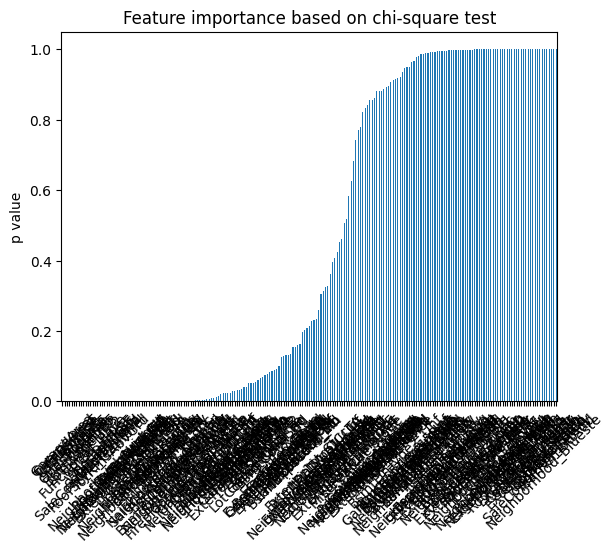

In [ ]:
from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs1=SFS(RandomForestRegressor(n_jobs=4),k_features=5,forward=True,verbose=2,scoring='r2',cv=3)

In [ ]:
sfs1 = sfs1.fit(np.array(x_train), y_train)
x_train.columns[list(sfs1.k_feature_idx_)]

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:  2.5min finished

[2025-08-20 01:33:38] Features: 1/5 -- score: 0.6688662906209687[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   31.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:  2.6min finished

[2025-08-20 01:36:13] Features: 2/5 -- score: 0.7212246504772266[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   31.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done 211 out of 211 | elapsed:  2.6min finished

[2025-08-20 01:38:48] Features: 3/5 -- score: 0.7456827689217206[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   32.9s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  2.7min finished

[2025-08-20 01:41:27] Features: 4/5 

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'GarageCars',
       'Neighborhood_Crawfor'],
      dtype='object')

In [ ]:
print('best accracy score',sfs1.k_score_)
print('best subset(indices)',sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_)

best accracy score 0.7756862217946005
best subset(indices) (4, 17, 19, 26, 60)
Best subset (corresponding names): ('4', '17', '19', '26', '60')


In [ ]:
sfs4=SFS(RandomForestRegressor(n_jobs=4),k_features=5,forward=False,verbose=2,scoring='r2',cv=3)
sfs4=sfs4.fit(np.array(x_train_selected.fillna(0)),y_train)
print('best accracy score',sfs4.k_score_)
print('best subset(indices)',sfs4.k_feature_idx_)
print('Best subset (corresponding names):', sfs4.k_feature_names_)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.0s finished

[2025-08-20 01:45:02] Features: 9/5 -- score: 0.8163598294713554[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.9s finished

[2025-08-20 01:45:16] Features: 8/5 -- score: 0.8195785661301512[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.3s finished

[2025-08-20 01:45:29] Features: 7/5 -- score: 0.8160510572524178[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.9s finished

[2025-08-20 01:45:38] Features: 6/5 -- score: 0.8093752940554797

best accracy score 0.8071336749337302
best subset(indices) (1, 2, 3, 5, 8)
Best subset (corresponding names): ('1', '2', '3', '5', '8')


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.9s finished

[2025-08-20 01:45:46] Features: 5/5 -- score: 0.8071336749337302

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs=EFS(RandomForestRegressor(n_jobs=4),min_features=1,max_features=4,scoring='r2',cv=5)
efs=efs.fit(x_train_selected,y_train)
print('best accuracy score',efs.best_score_)
print('best subset(indices)',efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 385/385

best accuracy score 0.8007853031056555
best subset(indices) (1, 2, 3, 5)
Best subset (corresponding names): ('OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, criterion='squared_error')
rfr.fit(x_train, y_train)
for feature in zip(x_train.columns, rfr.feature_importances_):
    print(feature)

('Id', np.float64(0.00351550711087482))
('MSSubClass', np.float64(0.0023130703455869887))
('LotFrontage', np.float64(0.0056785124929431404))
('LotArea', np.float64(0.016310089640385064))
('OverallQual', np.float64(0.5524877727531102))
('OverallCond', np.float64(0.005444948032148983))
('YearBuilt', np.float64(0.013452314175141806))
('YearRemodAdd', np.float64(0.006050508553185474))
('MasVnrArea', np.float64(0.012012935404550935))
('BsmtFinSF1', np.float64(0.029908597585932294))
('BsmtFinSF2', np.float64(0.0005610199846288104))
('BsmtUnfSF', np.float64(0.006237728925846049))
('TotalBsmtSF', np.float64(0.032318565721661675))
('1stFlrSF', np.float64(0.02777069094763762))
('2ndFlrSF', np.float64(0.011618325476014308))
('LowQualFinSF', np.float64(0.00017854147340882494))
('GrLivArea', np.float64(0.12431923141461264))
('BsmtFullBath', np.float64(0.0007151866599565041))
('BsmtHalfBath', np.float64(0.0005541389625868165))
('FullBath', np.float64(0.0024949970515658238))
('HalfBath', np.float64(0

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=rfr, threshold=0.2)
sfm = sfm.fit(x_train, y_train)
feature_names=x_train.columns
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])


The most important features based on random forest classifier:
- OverallQual


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rfr_full = RandomForestRegressor(random_state=0, criterion='squared_error')
rfr_full.fit(x_train, y_train)
pred_full = rfr_full.predict(x_test)
print("R² Score:", r2_score(y_test, pred_full))
print("MSE:", mean_squared_error(y_test, pred_full))

R² Score: 0.8495377937924488
MSE: 1021486630.1314864


In [ ]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [ ]:
print(x_important_train.shape)
print(x_important_test.shape)


(1022, 1)
(438, 1)


In [ ]:
rfr_lim = RandomForestRegressor(random_state=0, criterion='squared_error')
rfr_lim.fit(x_important_train, y_train)
pred_lim = rfr_lim.predict(x_important_test)
print("R² Score (limited features):", r2_score(y_test, pred_lim))
print("MSE (limited features):", mean_squared_error(y_test, pred_lim))

R² Score (limited features): 0.6914271092644155
MSE (limited features): 2094898714.1171165
